# PartII Implement MLP and Generate Test and Training Data Using Make_moon
The code is in the .py files

In [5]:
import sklearn.datasets as skd
import numpy as np
dataSet, labels = skd.make_moons(1000, noise = 0.01)
testDataSet, testLabels = skd.make_moons(200, noise = 0.01)
features = {}
n_features = 2
n = 0
labels_onehot = []
for l in labels:
    x = np.zeros(n_features)
    if(l in features):
        x[features[l]] = 1
    else:
        features[l] = n
        x[features[l]] = 1
        n += 1
    labels_onehot.append(x)

# Part III Test with SGD and BGD
In this problem, SGD is both faster and better

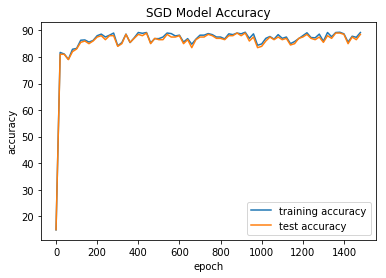

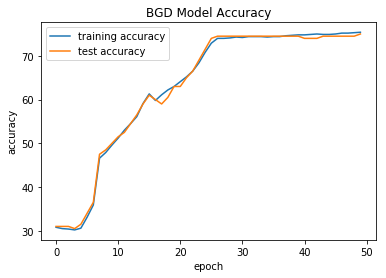

In [20]:
from mlp_numpy import *
from modules import *
import matplotlib.pyplot as plt
from train_mlp_numpy import *
testResult = []
trainResult = []
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-1
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 20
mlp = MLP(2,[20],2)
mlp.lRate = LEARNING_RATE_DEFAULT
CE = CrossEntropy()

for i in range(MAX_EPOCHS_DEFAULT):
    if(i % EVAL_FREQ_DEFAULT == 0):
        correct = 0
        for data, label in zip(testDataSet, testLabels):
            result = mlp.forward(data)
            if(np.argmax(result) == features[label] and result.max() != 0.5):
                correct += 1
        testResult.append(correct*100/len(testDataSet))
        correct = 0
        for data, label in zip(dataSet, labels):
            result = mlp.forward(data)
            if(np.argmax(result) == features[label] and result.max() != 0.5):
                correct += 1
        trainResult.append(correct*100/len(dataSet))
    train(mlp, dataSet, labels_onehot, "SGD")

x = range(0,MAX_EPOCHS_DEFAULT,20)
plt.plot(x, trainResult,label = "training accuracy")
plt.plot(x, testResult, label = "test accuracy")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("SGD Model Accuracy")
plt.show()
plt.cla()
testResult = []
trainResult = []

mlp1 = MLP(2,[20],2)
for i in range(50):
    correct = 0
    for data, label in zip(testDataSet, testLabels):
        result = mlp1.forward(data)
        if(np.argmax(result) == features[label] and result.max() != 0.5):
            correct += 1
    testResult.append(correct*100/len(testDataSet))
    correct = 0
    for data, label in zip(dataSet, labels):
        result = mlp1.forward(data)
        if(np.argmax(result) == features[label] and result.max() != 0.5):
            correct += 1
    trainResult.append(correct*100/len(dataSet))
    train(mlp1, dataSet, labels_onehot, "BGD")

x = range(0,50,1)
plt.plot(x, trainResult,label = "training accuracy")
plt.plot(x, testResult, label = "test accuracy")
plt.legend(loc="best")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("BGD Model Accuracy")
plt.show()